<div style="text-align: center;">
    <h2 style="color: #007BFF;">DEP Task 4 : Analyze network traffic data</h2>
</div>

<div style="text-align: left;">
   <h2 style="color: #007BFF;">Connect with Me</h2>
</div>
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <a href="https://www.linkedin.com/in/zeeshan--ahmed" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn">
    </a>
    <br>
    <a href="https://www.kaggle.com/zeeshanahmad124586" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle" alt="Kaggle">
    </a>
    <br>
    <a href="https://github.com/zeeshanAhmed2798" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub">
    </a>
</div>


### Import Imp Libraries

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


### Exploration

In [3]:
df=pd.read_excel("/content/Task4DataSet.xlsx")

In [4]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [6]:
df.isna().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [37]:
df.describe()

,bytes_in,bytes_out,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,detection_types,duration
count,2.820000e+02,2.820000e+02,282.000000,282.000000,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0,282.0
mean,1.199390e+06,8.455429e+04,7.907801,3.804965,0.0,200.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
std,4.149312e+06,2.549279e+05,6.437104,2.083893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4.000000e+01,4.400000e+01,0.000000,0.000000,0.0,200.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
25%,5.381500e+03,1.114200e+04,4.000000,2.000000,0.0,200.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
50%,1.318200e+04,1.379950e+04,7.000000,4.000000,0.0,200.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
75%,3.083300e+04,2.627950e+04,11.000000,6.000000,0.0,200.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0
max,2.520779e+07,1.561220e+06,27.000000,6.000000,0.0,200.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0


### clean

In [7]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
df['duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

In [18]:
df.drop(columns=['creation_time', 'end_time', 'time'], inplace=True)


In [19]:
le = LabelEncoder()
categorical_columns = [
    'src_ip', 'src_ip_country_code', 'protocol',
    'dst_ip', 'rule_names', 'observation_name',
    'source.meta', 'source.name', 'detection_types'
]
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [20]:
df.dtypes

bytes_in                 int64
bytes_out                int64
src_ip                   int64
src_ip_country_code      int64
protocol                 int64
response.code            int64
dst_port                 int64
dst_ip                   int64
rule_names               int64
observation_name         int64
source.meta              int64
source.name              int64
detection_types          int64
duration               float64
dtype: object

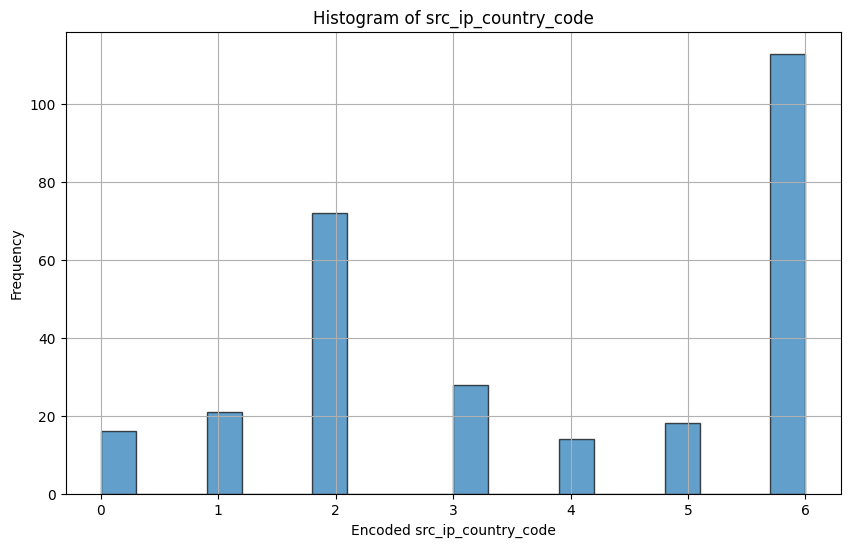

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['src_ip_country_code'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of src_ip_country_code')
plt.xlabel('Encoded src_ip_country_code')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## model Trainig

In [22]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [23]:
x_scaled

array([[-0.28821898, -0.28122272, -0.45252816, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28210833, -0.26080425,  0.6368506 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28268922, -0.27934434,  0.01434845, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.79640323,  5.80278149, -0.29690262, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28818663, -0.28466509, -0.14127708, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28739087, -0.30923327, -0.60815369, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
x_train, x_test = train_test_split(x_scaled, test_size=0.2, random_state=42)

In [26]:
model=IsolationForest(contamination=0.1,random_state=42)
model.fit(x_train)

IsolationForest(contamination=0.1, random_state=42)

In [28]:
y_pred_test=model.predict(x_test)

In [29]:
y_pred_test

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [30]:
y_pred_test=[1 if x==1 else 0 for x in y_pred_test]

In [31]:
y_pred_test

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [32]:
y_test=[1]*len(y_pred_test)

In [33]:
print("Classification Report : ")
print(classification_report(y_test,y_pred_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95        57

    accuracy                           0.91        57
   macro avg       0.50      0.46      0.48        57
weighted avg       1.00      0.91      0.95        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
conf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix :\n ",conf_matrix)

Confusion Matrix :
  [[ 0  0]
 [ 5 52]]
